In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import statannot
import math
plt.rcParams.update({'font.size': 22})

### Stringer data

In [7]:
# Change once updated
f = scipy.io.loadmat(f'./data/StringerNeuropixels/KrebswithFaces_KS2.mat')
area_labels = [x[0] for x in f['areaLabels'][0]]
locations = f['brainLoc']

In [37]:
def add_elements(results, curvature, mouse, area, res_type, rand_iter, average):
    if type(curvature) == np.float64:
        results['Curvature'].append(curvature)
        N=1
    else:
        results['Curvature'].extend(curvature)
        N=len(curvature)
    results['Animal'].extend([mouse]* N)
    results['Area'].extend([area]* N)
    results['Type'].extend([res_type]* N)
    results['RandIter'].extend([rand_iter]* N)
    results['Average'].extend([average]* N)
    return results

mice = ['Krebs',  'Robbins', 'Waksman']
all_labels = ['All neurons']
all_labels.extend(area_labels)

n_iter = 20
n_frames_selected = 30 # 10 seconds
results_stringer = {'Animal': [], 'Area': [], 'Curvature': [], 'Type': [], 'RandIter': [], 'Average': []}
for mouse in mice:
    for area in all_labels:
        area_label = '' if area == 'All neurons' else f'_{area}' 
        try:
            d = np.load(f'./results/Curvature/Curvature_Stringer_{mouse}_1dt_10windowsize{area_label}.npz', allow_pickle=True)
        except FileNotFoundError:
            # print(f'./results/Curvature/Curvature_Stringer_{mouse}_1dt_10windowsize{area_label}.npz')
            continue
            
           
        add_elements(results_stringer, d['curvatures'].squeeze(), mouse, area, 'Real', -1, False)

        for i_shuffle, res_shuffle in enumerate(d['curvatures_shuffled']):
            add_elements(results_stringer, res_shuffle.squeeze(), mouse, area, 'Shuffled', i_shuffle, False)
        
        n_frames = len(d['curvatures'].squeeze())
        for i in range(n_iter):
            start_frame = np.random.randint(n_frames - n_frames_selected)
            avrg = np.mean(d['curvatures'].squeeze()[start_frame:start_frame + n_frames_selected])
            add_elements(results_stringer, avrg, mouse, area, 'Real', -1, True)

            for i_shuffle, res_shuffle in enumerate(d['curvatures_shuffled']):
                avrg = np.mean(res_shuffle.squeeze()[start_frame:start_frame + n_frames_selected])
                add_elements(results_stringer, avrg, mouse, area, 'Shuffled', i_shuffle, True)
            
df = pd.DataFrame.from_dict(results_stringer)    

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03



/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


HPF_Real v.s. HPF_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.742e+01
LS_Real v.s. LS_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.512e-169 stat=-2.795e+01
MB_Real v.s. MB_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.426e-296 stat=-3.716e+01
SC_Real v.s. SC_Shuffled: t-test independent samples with Bonferroni correction, P_val=5.093e-131 stat=-2.454e+01
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.549e+01
CP_Real v.s. CP_Shuffled: t-test independent samples with Bonferroni correction, P_val=7.460e-133 stat=-2.471e+01
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-7.055e+01
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=8.036e-199 stat=-3.032e+01
SomMoCtx_Real v.s. SomMoCtx_Shuffled: t-test independent samp

/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


HPF_Real v.s. HPF_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.217e+01
LH_Real v.s. LH_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.880e-55 stat=-1.584e+01
LS_Real v.s. LS_Shuffled: t-test independent samples with Bonferroni correction, P_val=3.093e-12 stat=-7.277e+00
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-1.126e+02
CP_Real v.s. CP_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.752e+01
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-1.227e+02
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.727e+01
RSP_Real v.s. RSP_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.129e-130 stat=-2.446e+01
SomMoCtx_Real v.s. SomMoCtx_Shuffled: t-test independent sample

/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


HPF_Real v.s. HPF_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.433e+01
LS_Real v.s. LS_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.313e-98 stat=-2.123e+01
MB_Real v.s. MB_Shuffled: t-test independent samples with Bonferroni correction, P_val=9.311e-183 stat=-2.899e+01
SC_Real v.s. SC_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.338e+01
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-8.081e+01
FrCtx_Real v.s. FrCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=8.187e-167 stat=-2.769e+01
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-1.118e+02
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-6.772e+01
RSP_Real v.s. RSP_Shuffled: t-test independent samples wit

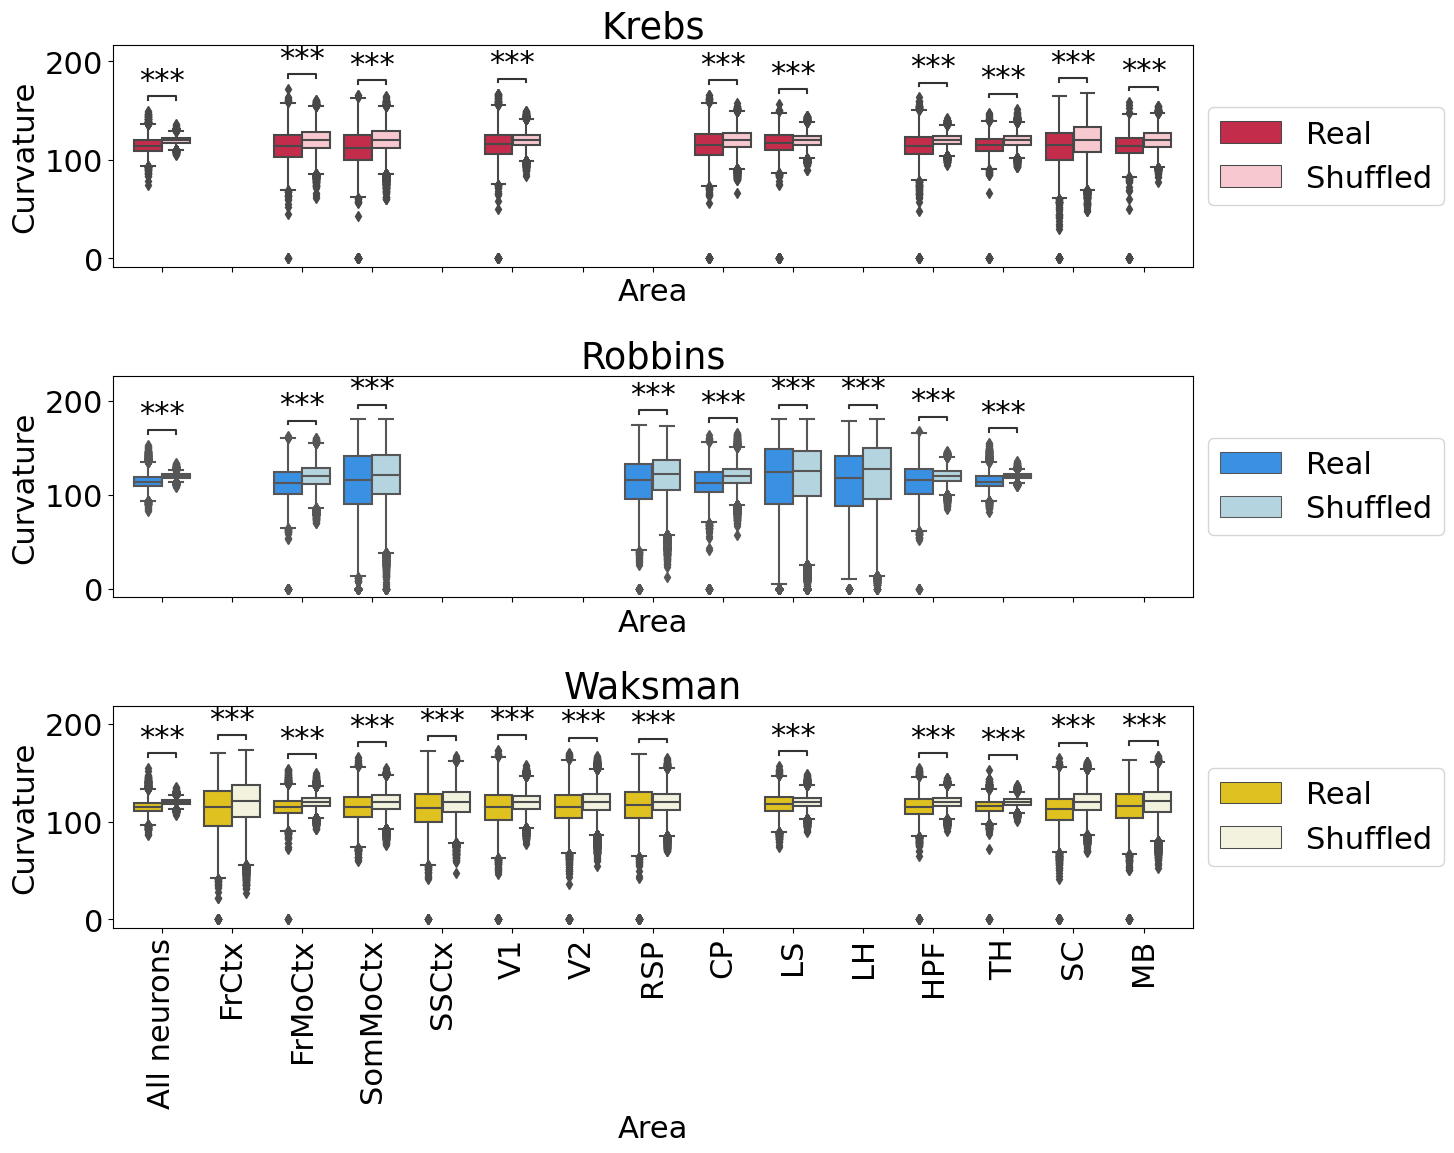

In [39]:
comparisons = []
for label in all_labels:
    area_label = 'All neurons' if label == '' else label    
    comparisons.append(((area_label, 'Real'), (area_label, 'Shuffled')))
mouse_colors = [['crimson', 'pink'], ['dodgerblue', 'lightblue'], ['gold', 'beige']]

fig, axs = plt.subplots(figsize=(15, 12), nrows=3, sharex=True)
for i, (mouse, ax) in enumerate(zip(mice, axs)):
    mouse_df = df[(df['Animal'] == mouse) & (df['Average'] == False)]
    sns.boxplot(data=mouse_df, x='Area', y='Curvature', hue='Type', palette=mouse_colors[i], ax=ax, order=all_labels)
    ax.set_title(mouse)
    ax.set_ylabel('Curvature')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    comparisons = []
    for label in np.unique(mouse_df['Area']):
        comparisons.append(((label, 'Real'), (label, 'Shuffled')))
    statannot.add_stat_annotation(
        ax,
        data=mouse_df,
        x='Area',
        y='Curvature',
        hue='Type',
        box_pairs=comparisons,
        order=all_labels,
        test="t-test_ind",
        text_format="star",
        loc="inside",
        pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
    )
    # ax, test_results = annot.annotate()
plt.xticks(rotation=90)
plt.tight_layout();

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

HPF_Real v.s. HPF_Shuffled: t-test independent samples with Bonferroni correction, P_val=5.073e-30 stat=-1.363e+01
LS_Real v.s. LS_Shuffled: t-test independent samples with Bonferroni correction, P_val=9.560e-10 stat=-6.806e+00


/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


MB_Real v.s. MB_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.472e-44 stat=-1.811e+01
SC_Real v.s. SC_Shuffled: t-test independent samples with Bonferroni correction, P_val=3.807e-15 stat=-8.817e+00
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=5.718e-54 stat=-2.123e+01
CP_Real v.s. CP_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.006e-20 stat=-1.059e+01
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=5.198e-69 stat=-2.646e+01
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.197e-32 stat=-1.437e+01
SomMoCtx_Real v.s. SomMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.305e-34 stat=-1.498e+01
V1_Real v.s. V1_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.260e-30 stat=-1.382e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00


/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


LS_Real v.s. LS_Shuffled: t-test independent samples with Bonferroni correction, P_val=4.526e-02 stat=-2.834e+00
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.643e-81 stat=-3.125e+01
CP_Real v.s. CP_Shuffled: t-test independent samples with Bonferroni correction, P_val=3.595e-34 stat=-1.491e+01
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.076e-95 stat=-3.732e+01
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.565e-35 stat=-1.533e+01
RSP_Real v.s. RSP_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.793e-12 stat=-7.767e+00
SomMoCtx_Real v.s. SomMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.688e-14 stat=-8.576e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

HPF_Real v.s. HPF_Shuffled: t-test

/Users/maren/miniconda3/lib/python3.9/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


MB_Real v.s. MB_Shuffled: t-test independent samples with Bonferroni correction, P_val=5.051e-15 stat=-8.814e+00
SC_Real v.s. SC_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.347e-48 stat=-1.951e+01
TH_Real v.s. TH_Shuffled: t-test independent samples with Bonferroni correction, P_val=3.860e-20 stat=-1.054e+01
FrCtx_Real v.s. FrCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.240e-07 stat=-5.970e+00
All neurons_Real v.s. All neurons_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.272e-59 stat=-2.309e+01
FrMoCtx_Real v.s. FrMoCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=2.003e-51 stat=-2.043e+01
RSP_Real v.s. RSP_Shuffled: t-test independent samples with Bonferroni correction, P_val=7.653e-08 stat=-6.061e+00
SSCtx_Real v.s. SSCtx_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.842e-27 stat=-1.287e+01
SomMoCtx_Real v.s. SomMoCtx_Shuffled: t-test independe

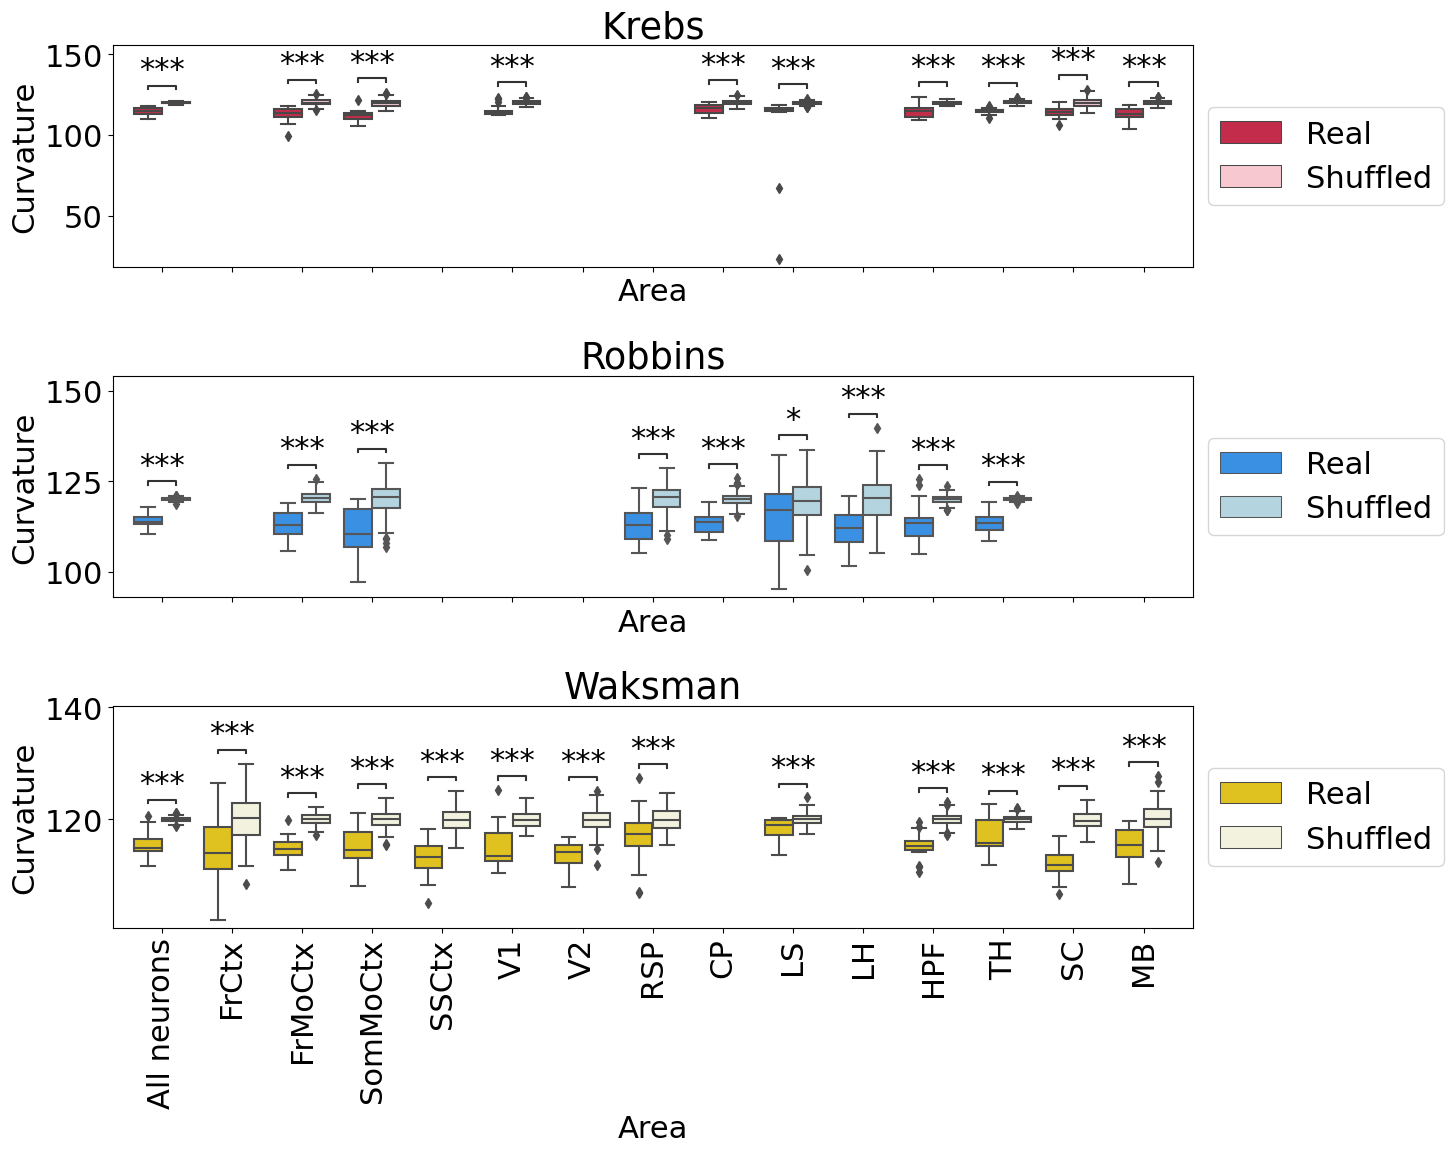

In [40]:
comparisons = []
for label in all_labels:
    area_label = 'All neurons' if label == '' else label    
    comparisons.append(((area_label, 'Real'), (area_label, 'Shuffled')))
mouse_colors = [['crimson', 'pink'], ['dodgerblue', 'lightblue'], ['gold', 'beige']]

fig, axs = plt.subplots(figsize=(15, 12), nrows=3, sharex=True)
for i, (mouse, ax) in enumerate(zip(mice, axs)):
    mouse_df = df[(df['Animal'] == mouse) & (df['Average'] == True)]
    sns.boxplot(data=mouse_df, x='Area', y='Curvature', hue='Type', palette=mouse_colors[i], ax=ax, order=all_labels)
    ax.set_title(mouse)
    ax.set_ylabel('Curvature')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    comparisons = []
    for label in np.unique(mouse_df['Area']):
        comparisons.append(((label, 'Real'), (label, 'Shuffled')))
    statannot.add_stat_annotation(
        ax,
        data=mouse_df,
        x='Area',
        y='Curvature',
        hue='Type',
        box_pairs=comparisons,
        order=all_labels,
        test="t-test_ind",
        text_format="star",
        loc="inside",
        pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
    )
    # ax, test_results = annot.annotate()
plt.xticks(rotation=90)
plt.tight_layout();

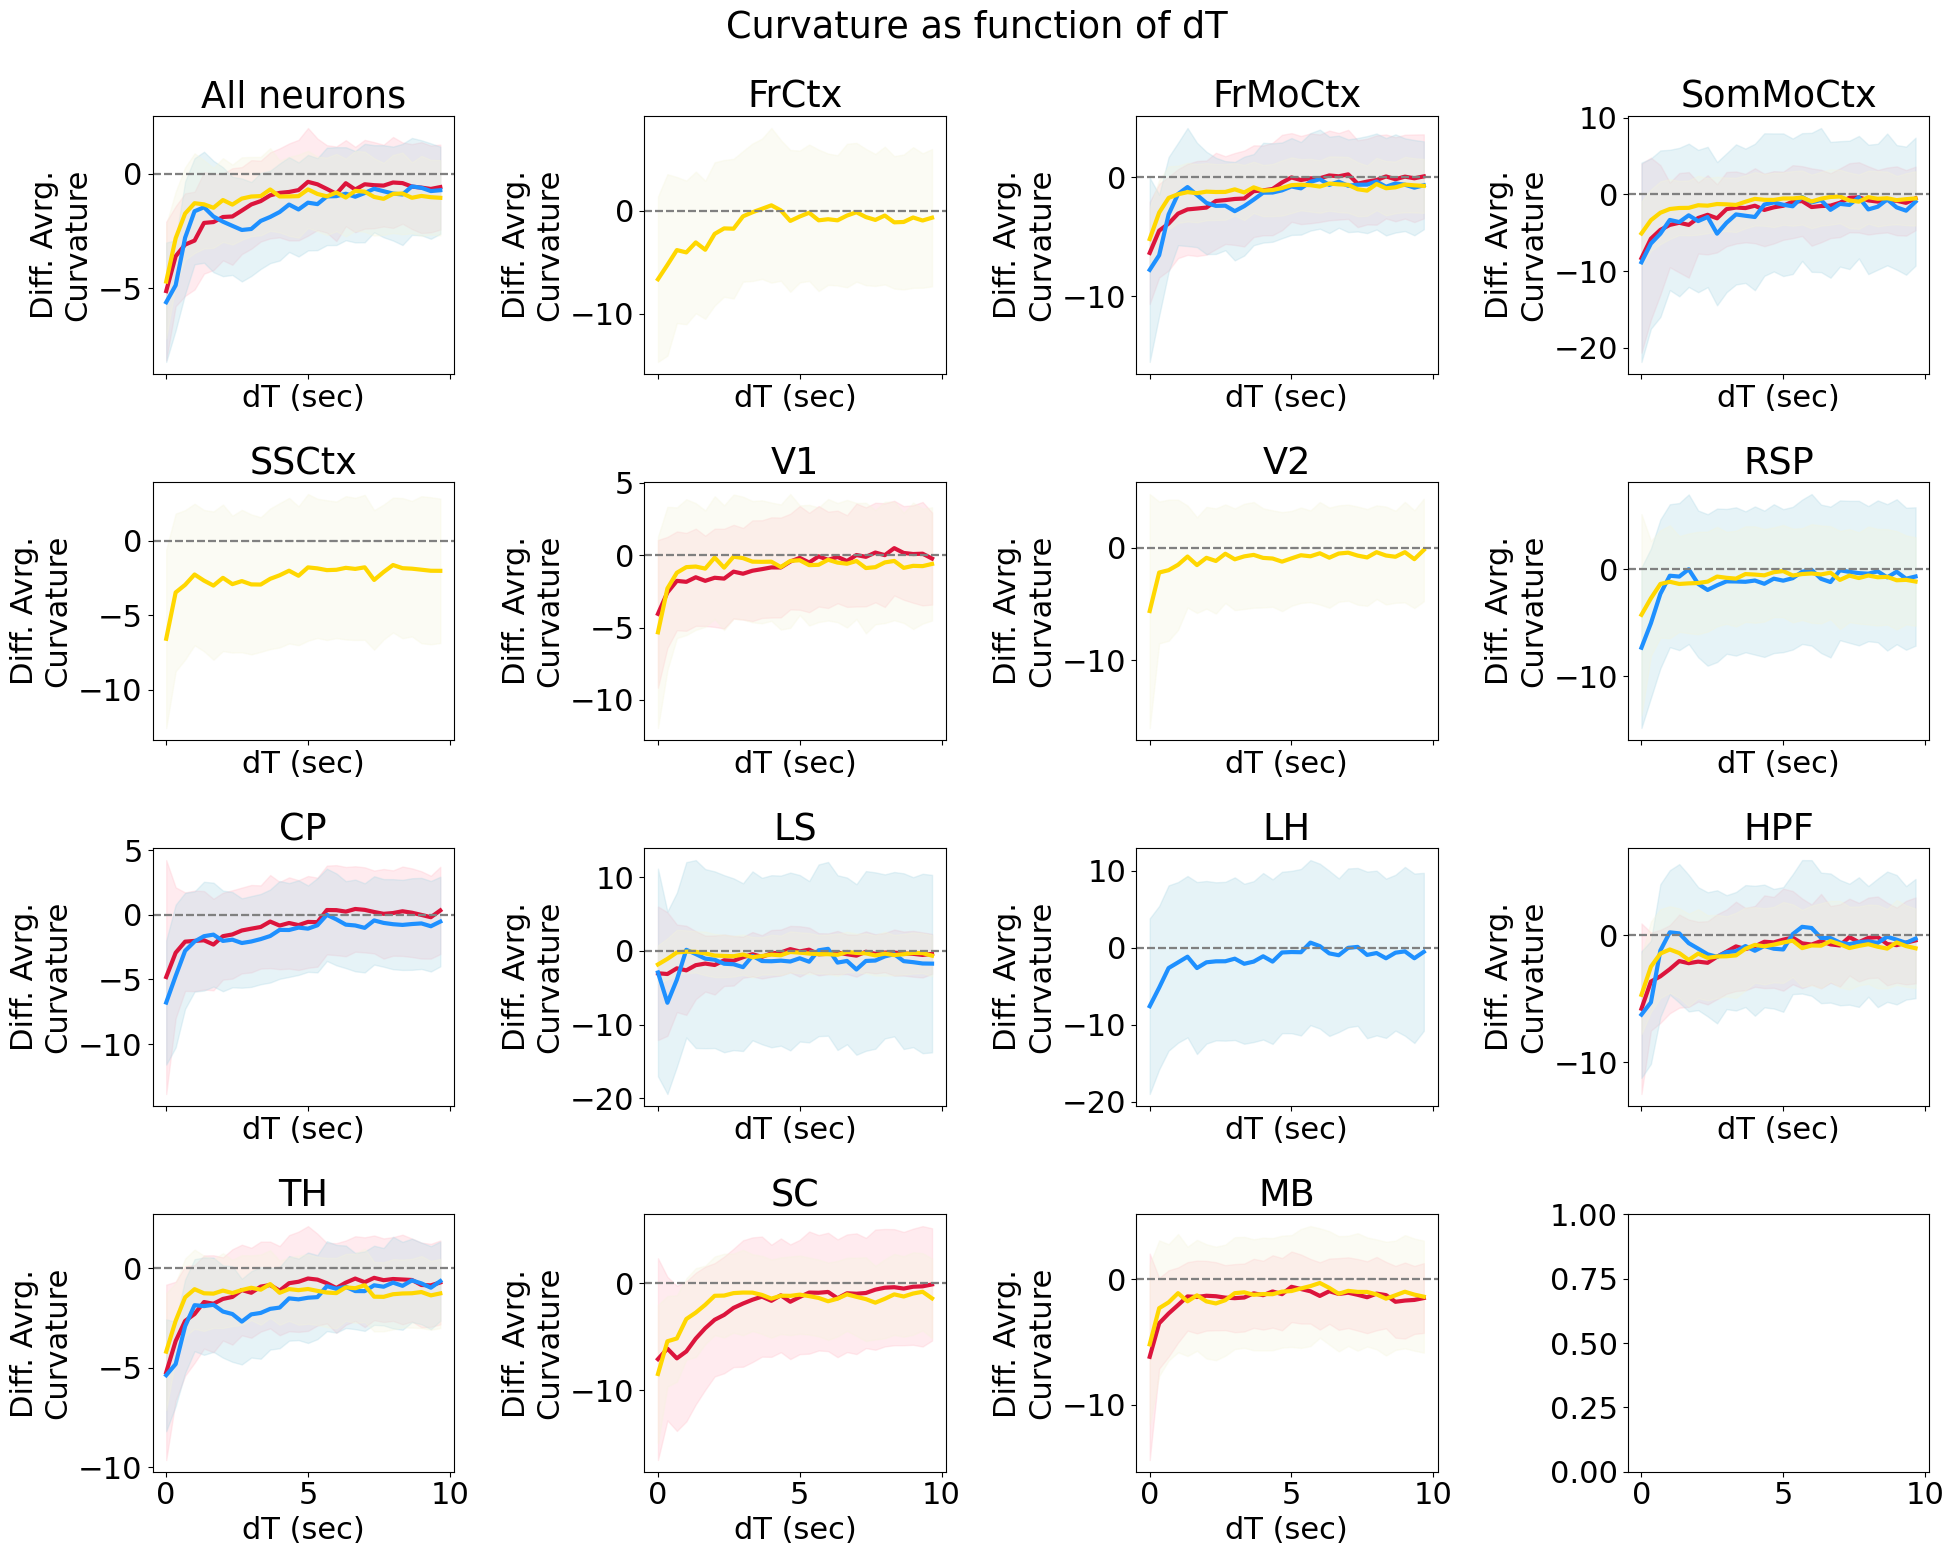

In [94]:
mice = ['Krebs',  'Robbins', 'Waksman']
mouse_colors = [['crimson', 'pink'], ['dodgerblue', 'lightblue'], ['gold', 'beige']]


n_frames_selected = 20
Hz = 3

fig, axs = plt.subplots(figsize=(20,16), ncols=4, nrows=4, sharex=True)
for mouse, color in zip(mice, mouse_colors):
    for area, ax in zip(all_labels, axs.flat):
        ax.set_title(area)
        roi = '' if area == 'All neurons' else f'_{area}' 
        mean_diff, sd_diff = [], []
        for dt in range(1, 50):
            try:
                d = np.load(f'./results/Curvature/Curvature_Stringer_{mouse}_{dt}dt_10windowsize{roi}.npz', allow_pickle=True)
            except FileNotFoundError:
                continue

            results = d['curvatures'][0]
            results_random = d[f'curvatures_shuffled'][0]
            # print(dt, results.shape, results_random.shape)
            diff = []
            for i in range(n_iter * (31 // dt)):
                for c, res in enumerate(results):
                    start_frame = np.random.randint(res.shape[-1] - n_frames_selected)
                    res_ = np.mean(res[..., start_frame:start_frame + n_frames_selected], axis=-1)
                    for res_shuff in results_random[:, c]:
                        r_shuff = np.mean(res_shuff[..., start_frame:start_frame + n_frames_selected], axis=-1)
                        diff.append(res_ - r_shuff)

            mean_diff.append(np.nanmean(diff))
            sd_diff.append(np.nanstd(diff))
        mean_diff, sd_diff = np.array(mean_diff), np.array(sd_diff)
        ax.plot(np.arange(len(mean_diff)) / Hz, mean_diff, color=color[0], lw=3, label=mouse)
        ax.fill_between(np.arange(len(mean_diff)) / Hz, mean_diff - sd_diff, mean_diff + sd_diff, 
                        color=color[1], alpha=.3)
        
        ax.axhline(0, ls='--', c='gray')
        ax.set_ylabel('Diff. Avrg.\nCurvature')
        ax.set_xlabel('dT (sec)')
        
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Curvature as function of dT')
plt.tight_layout()
plt.show()

## Monkey Ephys

In [41]:
df_monkey = {'Curvature': [], 'Type': []} #'Condition': [], 'Preprocessing': [],
use_avrg = True

d_ = np.load('./results/Curvature/Curvature_monkey_1dt.npz', allow_pickle=True)
curvatures = [d_[str(i)].item()['curvatures'] for i in range(5)]
curvatures_shuff = [d_[str(i)].item()['curvatures_shuffled'] for i in range(5)]
for curv, curv_shuff in zip(curvatures, curvatures_shuff):
    if use_avrg:
        curv = np.mean(curv, axis=-1)
        curv_shuff = np.mean(curv_shuff, axis=-1)
    diff = []
    for c_shuff in curv_shuff:
        diff.extend((list(curv.ravel() - c_shuff.ravel())))
    for res, inp_type in zip([curv.ravel(), curv_shuff.ravel(), diff], ['Real', 'Shuffled', 'Difference']):
        df_monkey['Type'].extend([inp_type] * len(res))
        df_monkey['Curvature'].extend(res)
df_monkey = pd.DataFrame.from_dict(df_monkey)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Real v.s. Shuffled: t-test independent samples with Bonferroni correction, P_val=3.348e-27 stat=-2.115e+01


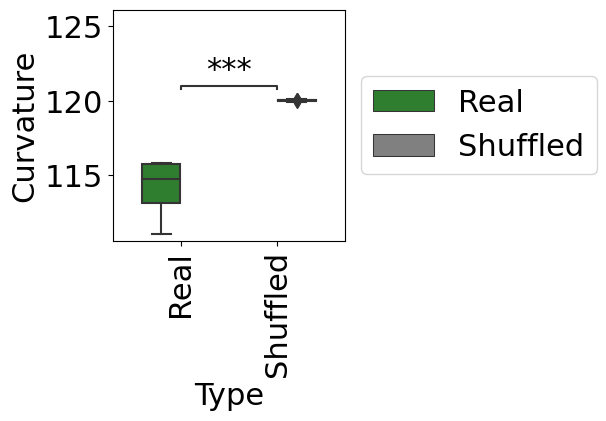

In [42]:
fig, ax = plt.subplots(figsize=(3, 3))
df_real_shuff = df_monkey[df_monkey['Type'] != 'Difference']
sns.boxplot(data=df_real_shuff, x='Type', y='Curvature', hue='Type', palette=['forestgreen', 'gray'], ax=ax)

statannot.add_stat_annotation(
    ax,
    data=df_real_shuff,
    x='Type',
    y='Curvature',
    box_pairs=[('Real', 'Shuffled')],
    test="t-test_ind",
    text_format="star",
    loc="inside",
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()

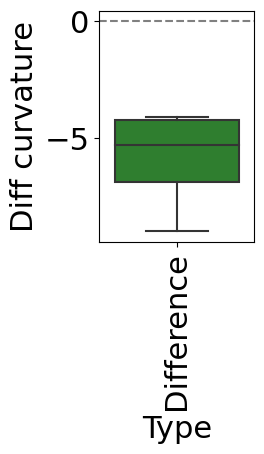

In [43]:
fig, ax = plt.subplots(figsize=(2, 3))
df_real_shuff = df_monkey[df_monkey['Type'] == 'Difference']
sns.boxplot(data=df_real_shuff, x='Type', y='Curvature', ax=ax, palette=['forestgreen'])
plt.axhline(0, ls='--', color='gray')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Diff curvature')
plt.xticks(rotation=90)
plt.show()

## Ferret

In [44]:
EO = ['before', 'after']
condition = ['anesth', 'awake']
FDiff = ['Orig', 'FDiff']
df = {'Data': [],  'Curvature': [], 'Type': []} #'Condition': [], 'Preprocessing': [],
use_avrg = True
for eo in EO:
    for cond in condition:
        # for fd in FDiff:
            fd = 'FDiff' #'Orig'
            d_ = np.load(f'./results/Curvature/Curvature_ferret_{eo}EO_{cond}_{fd}_15dt.npz')
            curv = d_['curvatures']
            curv_shuff = d_['curvatures_shuffled']
            if use_avrg:
                curv = np.mean(curv, axis=-1)
                curv_shuff = np.mean(curv_shuff, axis=-1)
            diff = []
            for c_shuff in curv_shuff:
                diff.extend((list(curv.ravel() - c_shuff.ravel())))
            for res, inp_type in zip([curv.ravel(), curv_shuff.ravel(), diff], ['Real', 'Shuffled', 'Difference']):
                df['Data'].extend([f'{fd}_{eo}EO_{cond}']*len(res))
                #df['Condition'].extend([cond]*len(res))
                #df['Preprocessing'].extend([fd]*len(res))
                df['Type'].extend([inp_type] * len(res))
                df['Curvature'].extend(res)
df = pd.DataFrame.from_dict(df)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

FDiff_afterEO_awake_Real v.s. FDiff_afterEO_awake_Shuffled: t-test independent samples with Bonferroni correction, P_val=3.700e-110 stat=5.802e+01
FDiff_afterEO_anesth_Real v.s. FDiff_afterEO_anesth_Shuffled: t-test independent samples with Bonferroni correction, P_val=9.317e-127 stat=7.400e+01
FDiff_beforeEO_anesth_Real v.s. FDiff_beforeEO_anesth_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.850e-28 stat=-1.375e+01
FDiff_beforeEO_awake_Real v.s. FDiff_beforeEO_awake_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.797e-70 stat=3.143e+01


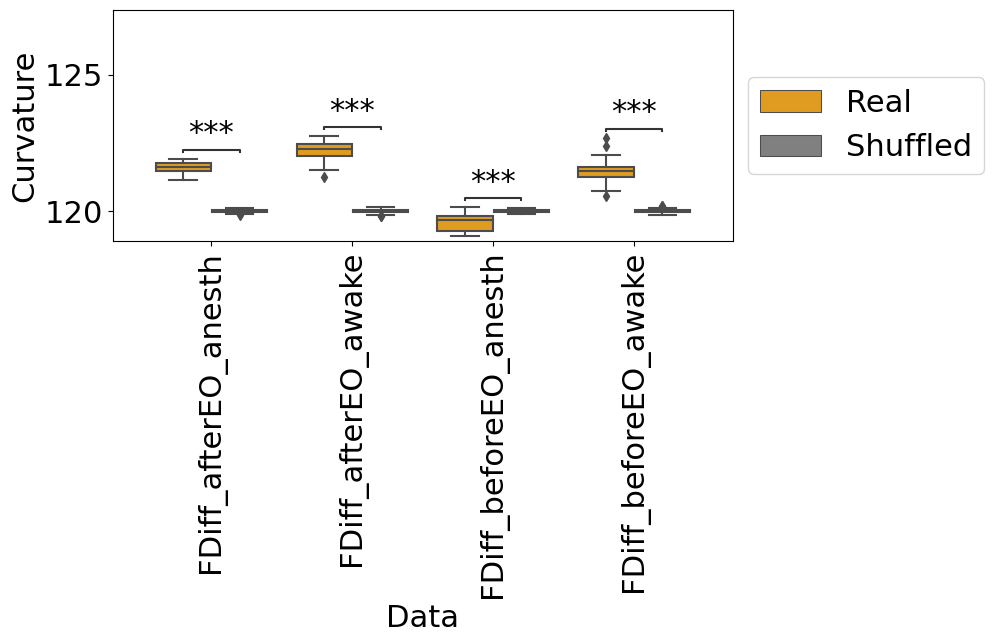

In [45]:
order = np.unique(df['Data'])
fig, ax = plt.subplots(figsize=(8, 3))
df_real_shuff = df[df['Type'] != 'Difference']
sns.boxplot(data=df_real_shuff, x='Data', y='Curvature', hue='Type', palette=['orange', 'gray'], ax=ax, order=order)

comparisons = []
for label in order:
    # print(label)
    comparisons.append(((label, 'Real'), (label, 'Shuffled')))
statannot.add_stat_annotation(
    ax,
    data=df_real_shuff,
    x='Data',
    y='Curvature',
    hue='Type',
    box_pairs=comparisons,
    order=order,
    test="t-test_ind",
    text_format="star",
    loc="inside",
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()

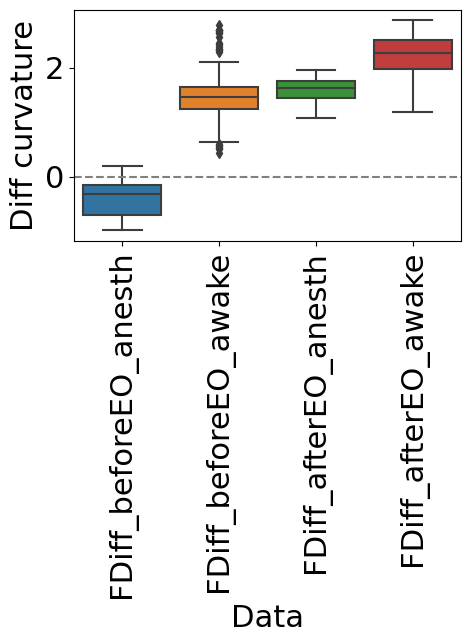

In [46]:
order = np.unique(df['Data'])
fig, ax = plt.subplots(figsize=(5, 3))
df_real_shuff = df[df['Type'] == 'Difference']
sns.boxplot(data=df_real_shuff, x='Data', y='Curvature', ax=ax)
plt.axhline(0, ls='--', color='gray')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Diff curvature')
plt.xticks(rotation=90)
plt.show()

### Difference dT

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 

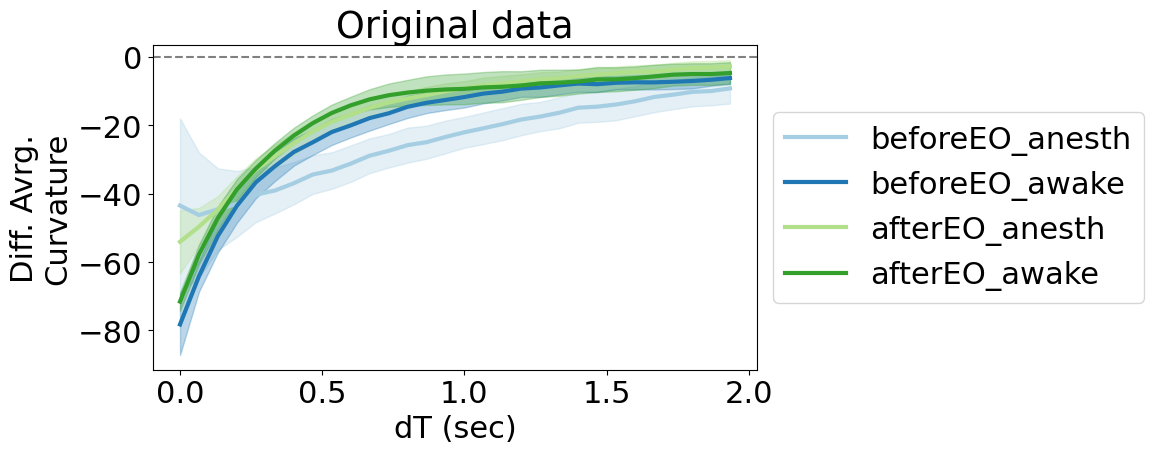

In [75]:
# use_avrg = True
colors = plt.cm.Paired(np.linspace(0,1,12))
counter = 0
fig, ax = plt.subplots(figsize=(12, 5))
n_frames_selected = 30 # 2 sec
n_iter = 20
Hz = 15
for eo in EO:
    for cond in condition:
        # for fd in FDiff:
            fd = 'Orig' #'Orig'
            mean_diff, sd_diff = [], []
            for dt in range(1, 31):
                d_ = np.load(f'./results/Curvature/Curvature_ferret_{eo}EO_{cond}_{fd}_{dt}dt.npz')
                curvatures = d_['curvatures']# .squeeze()
                curvatures_shuff = d_['curvatures_shuffled'] #.squeeze()
                diff = []
                for i in range(n_iter * (31 // dt)):
                    if i == 0:
                        print(len(curvatures), end=', ')
                    for c, curv in enumerate(curvatures):
                        start_frame = np.random.randint(len(curv) - n_frames_selected)
                        curv_ = np.mean(curv[start_frame:start_frame + n_frames_selected], axis=-1)
                        for curv_shuff in curvatures_shuff[:, c]:
                            c_shuff = np.mean(curv_shuff[start_frame:start_frame + n_frames_selected], axis=-1)
                            diff.append(curv_ - c_shuff)

                mean_diff.append(np.nanmean(diff))
                sd_diff.append(np.nanstd(diff))
            mean_diff, sd_diff = np.array(mean_diff), np.array(sd_diff)
            label = f'{eo}EO_{cond}'
            ax.plot(np.arange(len(mean_diff)) / Hz, mean_diff, color=colors[counter], lw=3, label=label)
            ax.fill_between(np.arange(len(mean_diff)) / Hz, mean_diff - sd_diff, mean_diff + sd_diff, 
                            color=colors[counter], alpha=.3)
            counter += 1
ax.axhline(0, ls='--', c='gray')
ax.set_ylabel('Diff. Avrg.\nCurvature')
ax.set_xlabel('dT (sec)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Original data')
plt.tight_layout()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, (array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 28, 29]),)
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29]),)
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       24, 25, 26, 27, 28, 29]),)


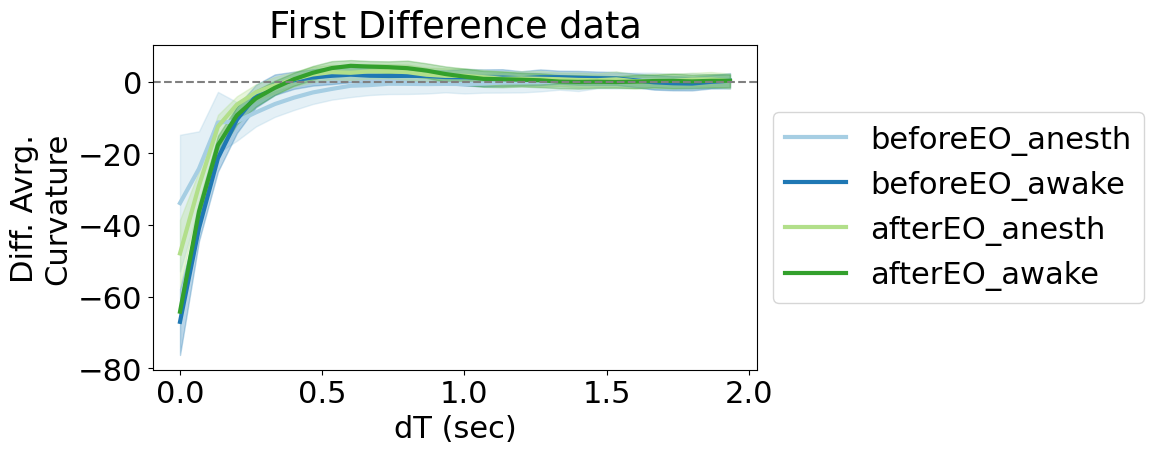

In [77]:
# use_avrg = True
colors = plt.cm.Paired(np.linspace(0,1,12))
counter = 0
fig, ax = plt.subplots(figsize=(12, 5))
n_frames_selected = 30 # 2 sec
n_iter = 20
Hz = 15
for eo in EO:
    for cond in condition:
        # for fd in FDiff:
            fd = 'FDiff' #'Orig'
            mean_diff, sd_diff = [], []
            for dt in range(1, 31):
                d_ = np.load(f'./results/Curvature/Curvature_ferret_{eo}EO_{cond}_{fd}_{dt}dt.npz')
                curvatures = d_['curvatures']# .squeeze()
                curvatures_shuff = d_['curvatures_shuffled'] #.squeeze()
                diff = []
                for i in range(n_iter * (31 // dt)):
                    if i == 0:
                        print(len(curvatures), end=', ')
                    for c, curv in enumerate(curvatures):
                        start_frame = np.random.randint(len(curv) - n_frames_selected)
                        curv_ = np.mean(curv[start_frame:start_frame + n_frames_selected], axis=-1)
                        for curv_shuff in curvatures_shuff[:, c]:
                            c_shuff = np.mean(curv_shuff[start_frame:start_frame + n_frames_selected], axis=-1)
                            diff.append(curv_ - c_shuff)

                mean_diff.append(np.nanmean(diff))
                sd_diff.append(np.nanstd(diff))
                
            mean_diff, sd_diff = np.array(mean_diff), np.array(sd_diff)
            print(np.where(mean_diff > 0))
            label = f'{eo}EO_{cond}'
            ax.plot(np.arange(len(mean_diff)) / Hz, mean_diff, color=colors[counter], lw=3, label=label)
            ax.fill_between(np.arange(len(mean_diff)) / Hz, mean_diff - sd_diff, mean_diff + sd_diff, 
                            color=colors[counter], alpha=.3)
            counter += 1
ax.axhline(0, ls='--', c='gray')
ax.set_ylabel('Diff. Avrg.\nCurvature')
ax.set_xlabel('dT (sec)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('First Difference data')
plt.tight_layout()

In [79]:
6 / 15

0.4

## Human

In [47]:
df_human = {'Curvature': [], 'Type': []} #'Condition': [], 'Preprocessing': [],
use_avrg = False

d_ = np.load(f'./results/Curvature/Curvature_Human_10dt.npz')
curvatures = d_['curvatures']
curvatures_shuff = d_['curvatures_shuffled']
for curv, curv_shuff in zip(curvatures, curvatures_shuff):
    if use_avrg:
        curv = np.mean(curv, axis=-1)
        curv_shuff = np.mean(curv_shuff, axis=-1)
    diff = []
    for c_shuff in curv_shuff:
        diff.extend((list(curv.ravel() - c_shuff.ravel())))
    for res, inp_type in zip([curv.ravel(), curv_shuff.ravel(), diff], ['Real', 'Shuffled', 'Difference']):
        df_human['Type'].extend([inp_type] * len(res))
        df_human['Curvature'].extend(res)
df_human = pd.DataFrame.from_dict(df_human)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Real v.s. Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-2.282e+02


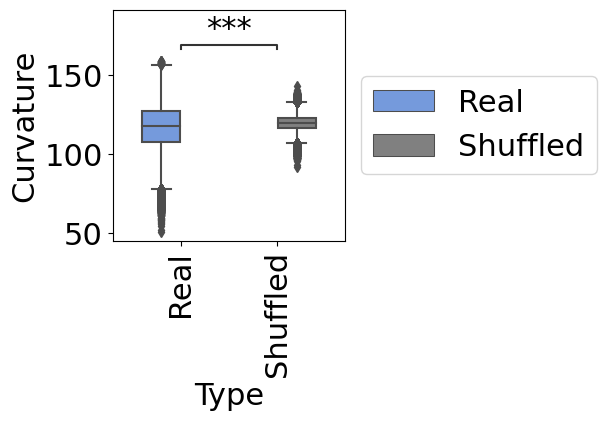

In [48]:
fig, ax = plt.subplots(figsize=(3, 3))
df_real_shuff = df_human[df_human['Type'] != 'Difference']
sns.boxplot(data=df_real_shuff, x='Type', y='Curvature', hue='Type', palette=['cornflowerblue', 'gray'], ax=ax)

statannot.add_stat_annotation(
    ax,
    data=df_real_shuff,
    x='Type',
    y='Curvature',
    box_pairs=[('Real', 'Shuffled')],
    test="t-test_ind",
    text_format="star",
    loc="inside",
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()

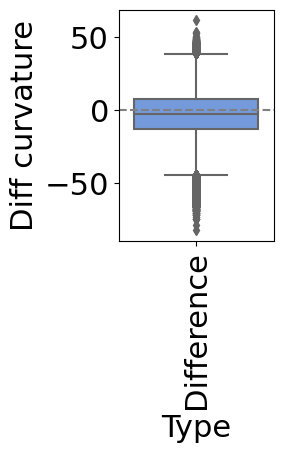

In [49]:
fig, ax = plt.subplots(figsize=(2, 3))
df_real_shuff = df_human[df_human['Type'] == 'Difference']
sns.boxplot(data=df_real_shuff, x='Type', y='Curvature', ax=ax, palette=['cornflowerblue'])
plt.axhline(0, ls='--', color='gray')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Diff curvature')
plt.xticks(rotation=90)
plt.show()

### Brain area specific

In [50]:
areas=['Whole brain', 'VIS', 'SMN', 'DAN', 'VAN', 'LIM', 'CON', 'DMN']
df_human = {'Curvature': [], 'Type': [], 'Area': []}
use_avrg = True
for area in areas:
    roi = '' if area == 'Whole brain' else f'_{area}'
    d_ = np.load(f'./results/Curvature/Curvature_human_10dt{roi}.npz')
    curvatures = d_['curvatures']
    curvatures_shuff = d_['curvatures_shuffled']
    for curv, curv_shuff in zip(curvatures, curvatures_shuff):
        if use_avrg:
            curv = np.mean(curv, axis=-1)
            curv_shuff = np.mean(curv_shuff, axis=-1)
        diff = []
        for c_shuff in curv_shuff:
            diff.extend((list(curv.ravel() - c_shuff.ravel())))
        for res, inp_type in zip([curv.ravel(), curv_shuff.ravel(), diff], ['Real', 'Shuffled', 'Difference']):
            df_human['Type'].extend([inp_type] * len(res))
            df_human['Area'].extend([area] * len(res))
            df_human['Curvature'].extend(res)
df_human = pd.DataFrame.from_dict(df_human)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

VIS_Real v.s. VIS_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-9.086e+01
Whole brain_Real v.s. Whole brain_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-1.303e+02
SMN_Real v.s. SMN_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.117e+01
DAN_Real v.s. DAN_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-8.836e+01
VAN_Real v.s. VAN_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-6.752e+01
LIM_Real v.s. LIM_Shuffled: t-test independent samples with Bonferroni correction, P_val=1.083e-105 stat=-2.202e+01
CON_Real v.s. CON_Shuffled: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-8.952e+01
DMN_Real v.s. DMN_Shuffled: t-test independen

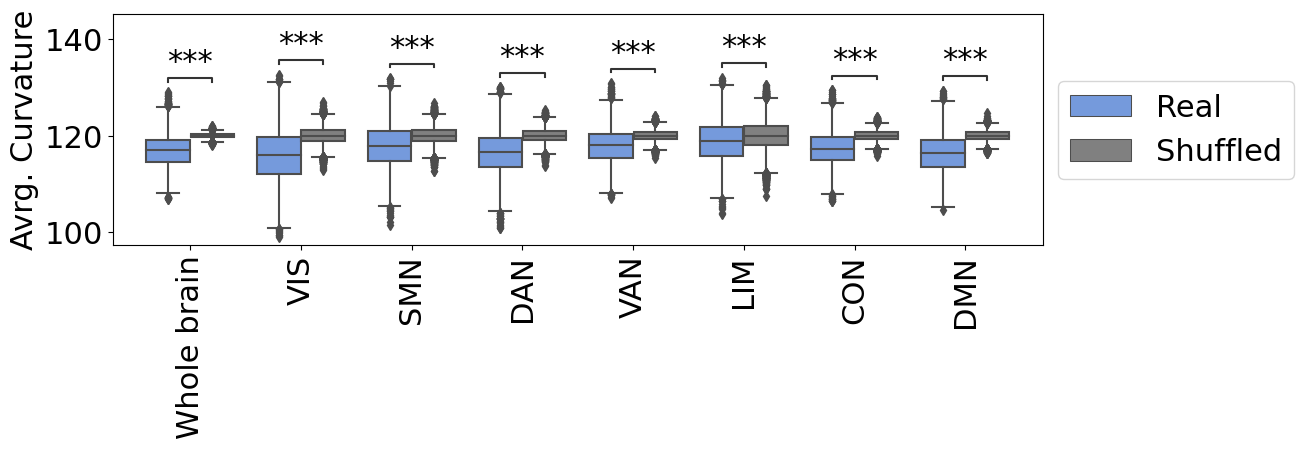

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))
df_real_shuff = df_human[df_human['Type'] != 'Difference']
sns.boxplot(data=df_real_shuff, x='Area', y='Curvature', hue='Type', palette=['cornflowerblue', 'gray'], 
            ax=ax, order=areas)

comparisons = []
for label in areas:
    # print(label)
    comparisons.append(((label, 'Real'), (label, 'Shuffled')))

statannot.add_stat_annotation(
    ax,
    data=df_real_shuff,
    x='Area',
    y='Curvature',
    hue='Type',
    box_pairs=comparisons,
    order=areas,
    test="t-test_ind",
    text_format="star",
    loc="inside",
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Avrg. Curvature')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

### Difference with dT

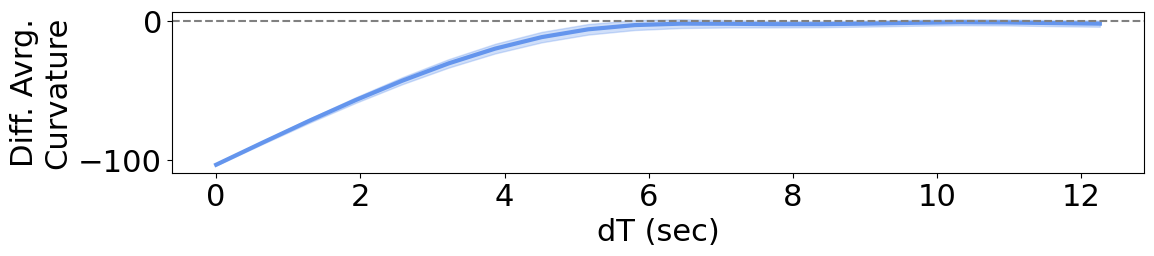

In [52]:
# use_avrg = True
differences = []
for dt in range(1, 21):
    d_ = np.load(f'./results/Curvature/Curvature_human_{dt}dt.npz')
    curvatures = d_['curvatures']
    curvatures_shuff = d_['curvatures_shuffled']
    diff = []
    for curv, curv_shuff in zip(curvatures, curvatures_shuff):
        # if use_avrg:
        curv = np.mean(np.mean(curv, axis=-1), axis=-1)
        curv_shuff = np.mean(np.mean(curv_shuff, axis=-1), axis=-1)
        # diff_ = []
        for c_shuff in curv_shuff:
            diff.extend((list(curv.ravel() - c_shuff.ravel())))
        # diff.append(diff_)
    differences.append(diff)
    
fig, ax = plt.subplots(figsize=(12, 3))
mean_diff = np.nanmean(differences, axis=1)
sd_diff = np.nanstd(differences, axis=1)
ax.plot(np.arange(len(mean_diff)) * .645, mean_diff, color='cornflowerblue', lw=3)
ax.fill_between(np.arange(len(mean_diff)) * .645, mean_diff - sd_diff, mean_diff + sd_diff, 
                color='cornflowerblue', alpha=.3)

ax.axhline(0, ls='--', c='gray')
ax.set_ylabel('Diff. Avrg.\nCurvature')
ax.set_xlabel('dT (sec)')
plt.tight_layout()